# I. Perkenalan
> Perkenalkan nama saya Pascalis Farrel, student Hacktiv8 FTDS Batch 008.

Graded Challenge 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:

1. Mampu memahami konsep Classification dengan Ensemble Model.
2. Mampu mempersiapkan data untuk digunakan dalam Ensemble Model.
3. Mampu mengimplementasikan Ensemble Model untuk membuat prediksi.

# II. Import Libraries
> Cell pertama pada notebook akan diisi semua library yang digunakan dalam project, antara lain **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, **missingno** dan **Scikit-Learn**.

In [310]:
# Import Libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# III. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

Dataset **heart_failure_clinical_records** berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

In [311]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## III.I. Data Characteristics

In [312]:
df.shape

(299, 13)

Dataframe ini terbentuk dari:
- **299** baris
- **13** kolom

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dari basic info ini dapat diketahui dataframe ini terdiri dari:
- 3 kolom dengan tipe float
- 10 kolom dengan tipe integer.

In [314]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Kebanyakan dari kolom pada dataframe memiliki distribusi yang normal, contohnya pada kolom `age` mean dan median kolom ini berdekatan.

## III.II. Data Cleaning

Pada proses data cleaning, dataset akan diperiksa apabila memiliki missing values.

In [315]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:>

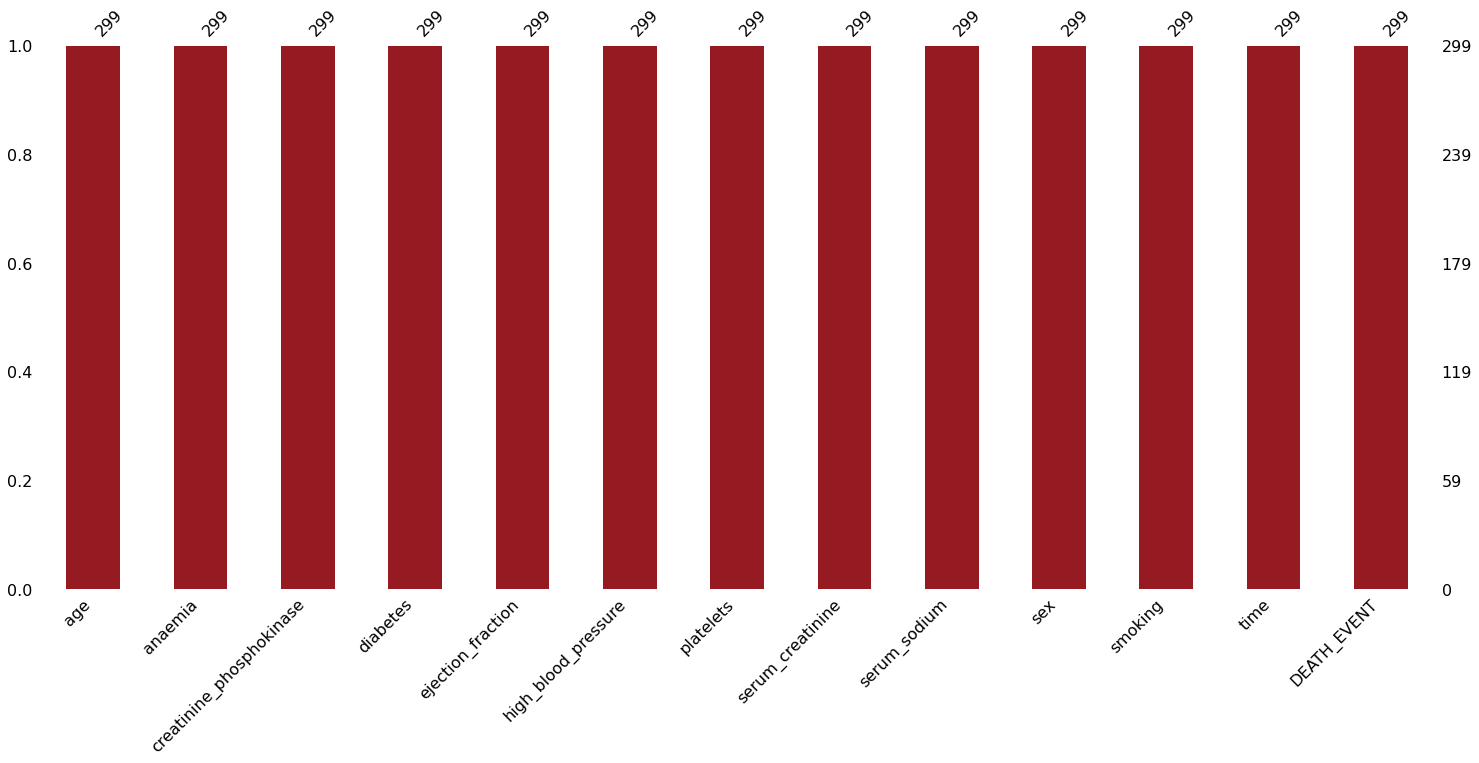

In [316]:
msno.bar(df, sort = 'ascending', color=(0.59, 0.1, 0.13))

## III.III. Duplicated Data

In [317]:
df.duplicated().any()

False

Diketahui bahwa dataframe tidak memiliki duplicated rows.

# IV. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

<AxesSubplot:>

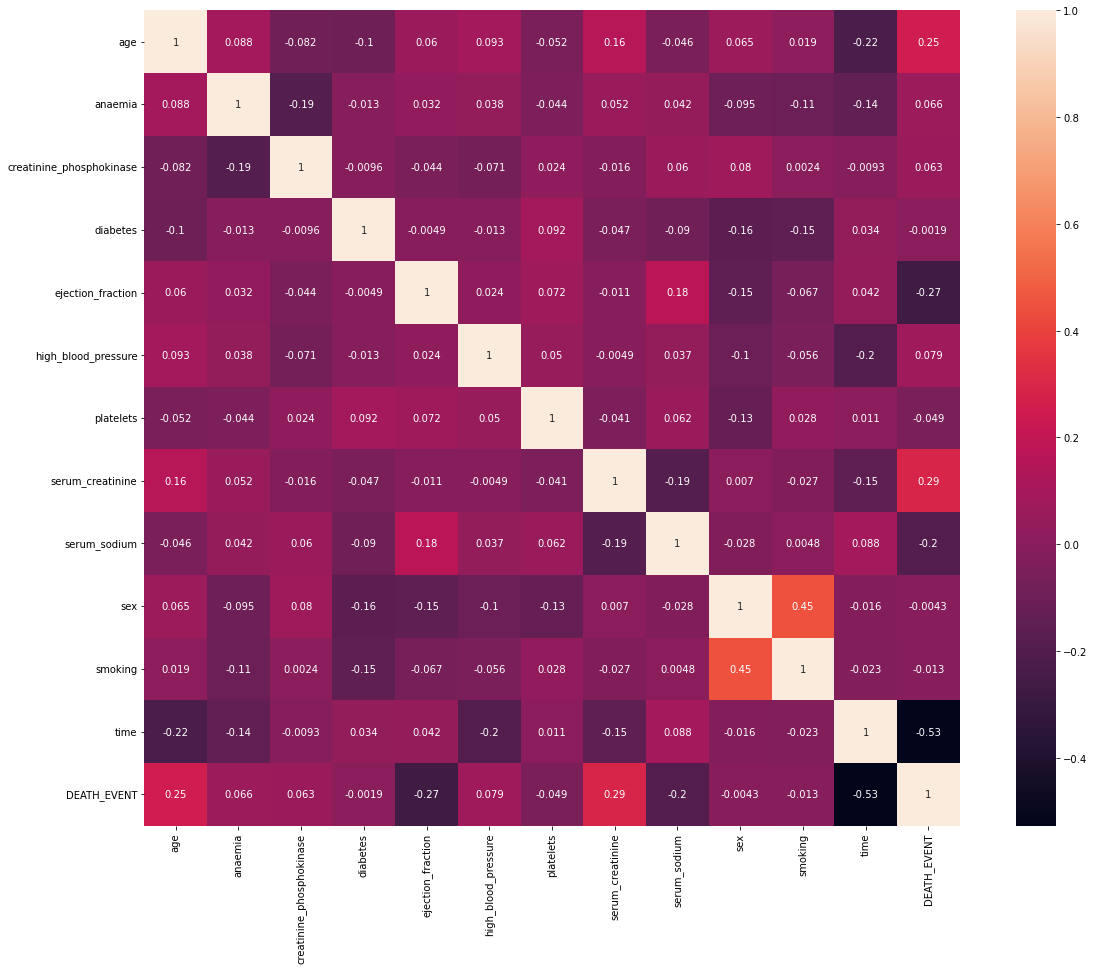

In [318]:
# Korelasi Data

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), square=True, annot=True)

Diketahui `age`,`ejection_fraction`, `serum_sodium`, `serum_creatinine`, dan `time` memiliki korelasi yang tinggi dengan `DEATH_EVENT`

In [319]:
df["DEATH_EVENT"].replace({1:"yes", 0:"no"}, inplace=True)

## age

Text(0, 0.5, 'Frequency')

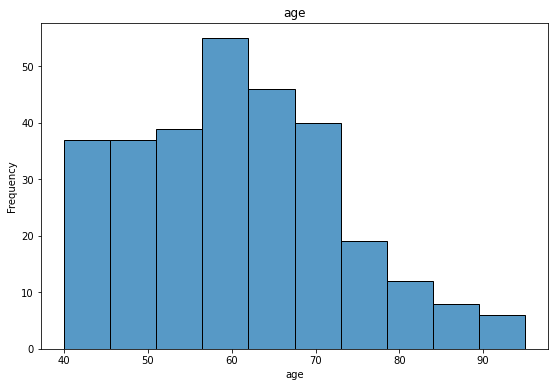

In [320]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='age', data=df)
plt.title('age')
plt.xlabel('age')
plt.ylabel('Frequency')

Jika dilihat dari count plot diatas, kebanyakan dari data mencatat orang dengan `age` sekitar **50 tahun** hingga **70 tahun**.

## Ejection_fraction
>Persentase darah yang meninggalkan jantung pada setiap kontraksi (persentase)

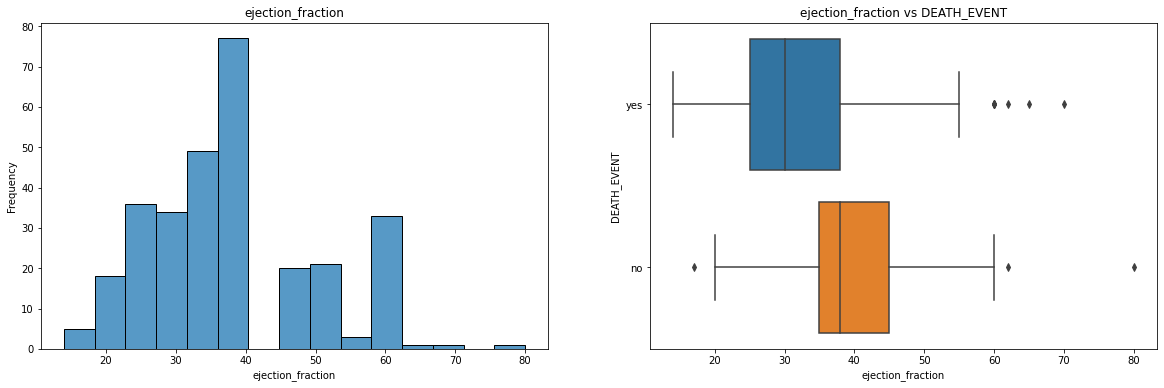

In [321]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='ejection_fraction', data=df)
plt.title('ejection_fraction')
plt.xlabel('ejection_fraction')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.boxplot(x='ejection_fraction', y='DEATH_EVENT', data=df)
plt.title('ejection_fraction vs DEATH_EVENT')
plt.xlabel('ejection_fraction')
plt.ylabel('DEATH_EVENT')
plt.show()

Diketahui orang yang meninggal memiliki persentase darah yang meninggalkan jantung yang lebih rendah dibanddingkan dengan orang yang tidak meninggal.

## Serum_sodium
>Kadar natrium serum dalam darah (mEq/L)

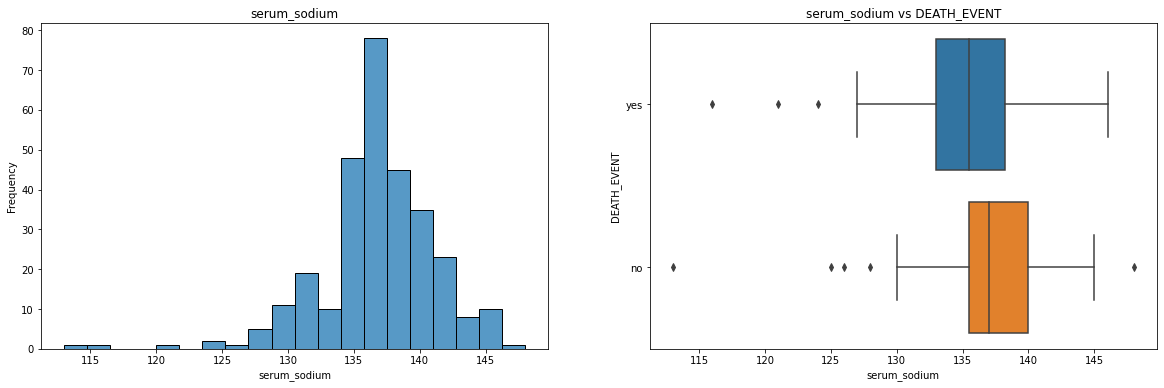

In [322]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='serum_sodium', data=df)
plt.title('serum_sodium')
plt.xlabel('serum_sodium')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.boxplot(x='serum_sodium', y='DEATH_EVENT', data=df)
plt.title('serum_sodium vs DEATH_EVENT')
plt.xlabel('serum_sodium')
plt.ylabel('DEATH_EVENT')
plt.show()

Diketahui orang yang meninggal memiliki kadar natrium yang lebih rendah dari orang yang masih hidup.

## Serum_creatinine
> Kadar kreatinin serum dalam darah (mg/dL)

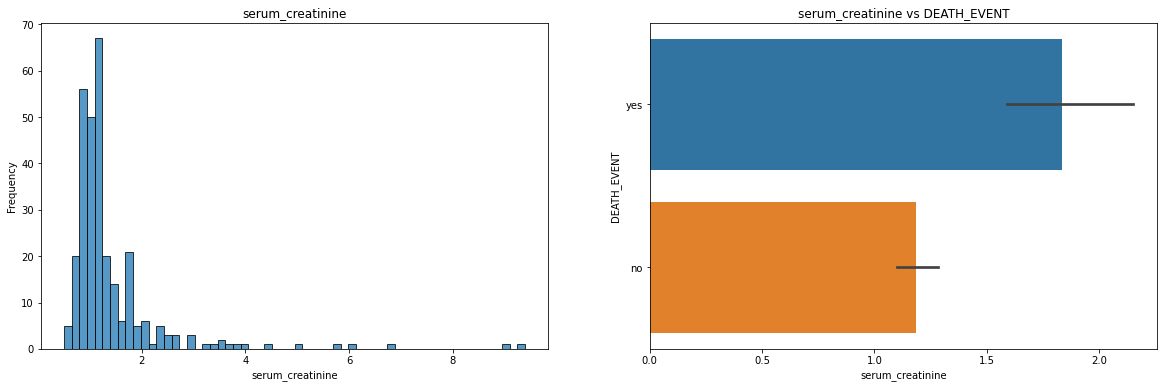

In [323]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='serum_creatinine', data=df)
plt.title('serum_creatinine')
plt.xlabel('serum_creatinine')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.barplot(x='serum_creatinine', y='DEATH_EVENT', data=df)
plt.title('serum_creatinine vs DEATH_EVENT')
plt.xlabel('serum_creatinine')
plt.ylabel('DEATH_EVENT')
plt.show()

Diketahui orang yang meninggal memiliki kadar kreatinin yang lebih tinggi dari orang yang masih hidup.

## DEATH_EVENT

Text(0.5, 1.0, 'DEATH_EVENT')

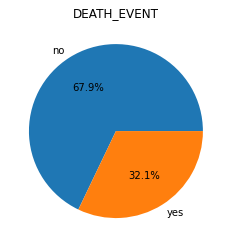

In [324]:
plt.figure(figsize=(12,4))
plt.pie(df.DEATH_EVENT.value_counts(), labels=df.DEATH_EVENT.value_counts().index, autopct='%1.1f%%')
plt.title('DEATH_EVENT')

Diketahui dari bar chart diatas, bahwa lebih banyak orang yang tidak mengalami kematian dibandingkan dengan orang yang mengalami kematian.

In [325]:
df["DEATH_EVENT"].replace({"yes": 1, "no": 0}, inplace=True)

# V. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## V.I. Get Data Inference

Mengambil 10 sampel pada dataframe untuk melakukan inference.

In [326]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state=17)
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
121,66.0,1,68,1,38,1,162000.00,1.00,136,0,0,95,0
94,58.0,0,144,1,38,1,327000.00,0.70,142,0,0,83,0
138,62.0,0,281,1,35,0,221000.00,1.00,136,0,0,108,0
288,65.0,0,892,1,35,0,263358.03,1.10,142,0,0,256,0
139,50.0,0,1548,0,30,1,211000.00,0.80,138,1,0,108,0
13,50.0,1,168,0,38,1,276000.00,1.10,137,1,0,11,1
230,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
165,80.0,0,776,1,38,1,192000.00,1.30,135,0,0,130,1
58,49.0,0,789,0,20,1,319000.00,1.10,136,1,1,55,1
122,60.0,0,96,1,38,0,228000.00,0.75,140,0,0,95,0


In [327]:
# Remove Inference-Set from Dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [328]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

# Display data_inf
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,66.0,1,68,1,38,1,162000.00,1.00,136,0,0,95,0
1,58.0,0,144,1,38,1,327000.00,0.70,142,0,0,83,0
2,62.0,0,281,1,35,0,221000.00,1.00,136,0,0,108,0
3,65.0,0,892,1,35,0,263358.03,1.10,142,0,0,256,0
4,50.0,0,1548,0,30,1,211000.00,0.80,138,1,0,108,0
5,50.0,1,168,0,38,1,276000.00,1.10,137,1,0,11,1
6,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
7,80.0,0,776,1,38,1,192000.00,1.30,135,0,0,130,1
8,49.0,0,789,0,20,1,319000.00,1.10,136,1,1,55,1
9,60.0,0,96,1,38,0,228000.00,0.75,140,0,0,95,0


## V.II. Split Dataset

Membuat training set dan test set dengan perbandingan **8:2**, dimana:
- **80%** data menjadi **training set**
- **20%** data menjadi **test set**

In [329]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=17)

In [330]:
df_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
207,85.0,0,212,0,38,0,186000.0,0.9,136,1,0,187,0
233,53.0,1,707,0,38,0,330000.0,1.4,137,1,1,209,0
116,60.0,1,96,1,60,1,271000.0,0.7,136,0,0,94,0
232,40.0,1,129,0,35,0,255000.0,0.9,137,1,0,209,0
48,80.0,1,553,0,20,1,140000.0,4.4,133,1,0,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,50.0,1,1051,1,30,0,232000.0,0.7,136,0,0,246,0
240,70.0,0,81,1,35,1,533000.0,1.3,139,0,0,212,0
143,61.0,1,84,0,40,1,229000.0,0.9,141,0,0,110,0
241,65.0,0,582,1,30,0,249000.0,1.3,136,1,1,212,0


In [331]:
df_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
121,66.000,1,68,1,38,1,162000.00,1.00,136,0,0,95,0
94,58.000,0,144,1,38,1,327000.00,0.70,142,0,0,83,0
138,62.000,0,281,1,35,0,221000.00,1.00,136,0,0,108,0
288,65.000,0,892,1,35,0,263358.03,1.10,142,0,0,256,0
139,50.000,0,1548,0,30,1,211000.00,0.80,138,1,0,108,0
13,50.000,1,168,0,38,1,276000.00,1.10,137,1,0,11,1
230,60.000,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
165,80.000,0,776,1,38,1,192000.00,1.30,135,0,0,130,1
58,49.000,0,789,0,20,1,319000.00,1.10,136,1,1,55,1
122,60.000,0,96,1,38,0,228000.00,0.75,140,0,0,95,0


### V.III. Handling Outlier

Pada bagian ini akan dilakukan outlier handling untuk kolom `age`, `ejection_fraction`, `serum_creatinine`, dan `serum_sodium` pada `df_train`.

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

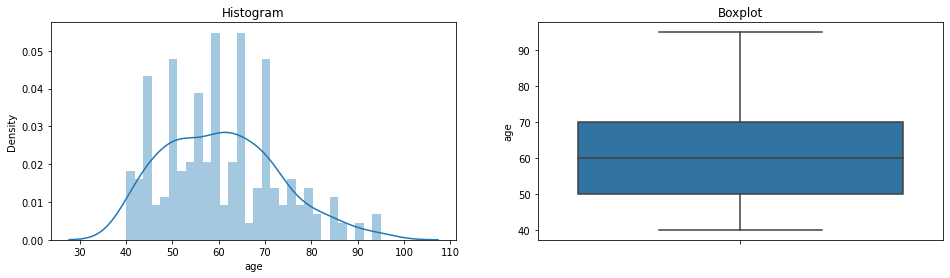

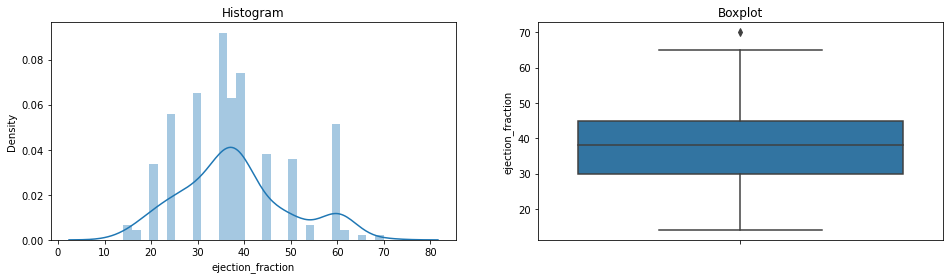

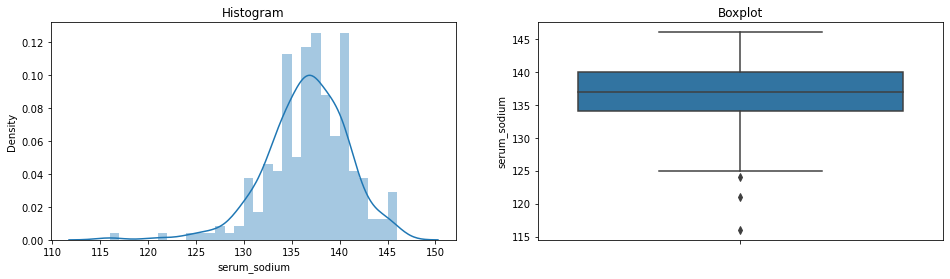

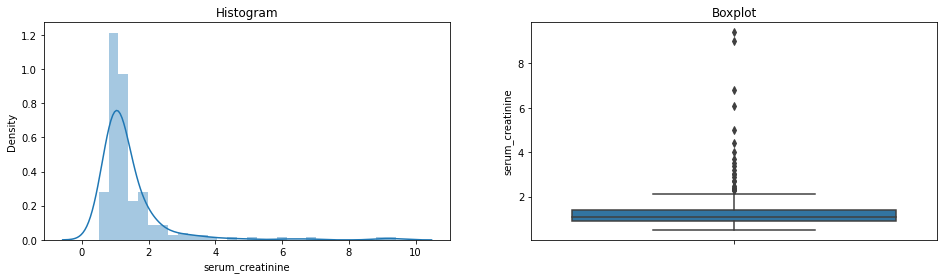

In [332]:
def diagnostic_plots(df_train, variables):
    # Define Figure Size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df_train[variables], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[variables])
    plt.title('Boxplot')

    plt.show

# Cek Outlier pada kolom 

diagnostic_plots(df_train, 'age')
diagnostic_plots(df_train, 'ejection_fraction')
diagnostic_plots(df_train, 'serum_sodium')
diagnostic_plots(df_train, 'serum_creatinine')

Karena distribusi dari kolom tersebut skewed, maka akan dilakukan outlier handling menggunakan **IQR**.

In [333]:
def find_skewed_boundaries(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[col].quantile(0.75) + (IQR * 1.5)

    return lower_bound, upper_bound


In [334]:
print(find_skewed_boundaries(df_train, 'ejection_fraction'))
print(find_skewed_boundaries(df_train, 'serum_sodium'))
print(find_skewed_boundaries(df_train, 'serum_creatinine'))

(7.5, 67.5)
(125.0, 149.0)
(0.15000000000000024, 2.1499999999999995)


In [335]:
s_lower_boundary, s_upper_boundary = find_skewed_boundaries(df_train, 'ejection_fraction')
a_lower_boundary, a_upper_boundary = find_skewed_boundaries(df_train, 'serum_sodium')
c_lower_boundary, c_upper_boundary = find_skewed_boundaries(df_train, 'serum_creatinine')

In [336]:
print(f'Number of outliers (ejection_fraction): {len(df_train[(df_train.ejection_fraction < s_lower_boundary) | (df_train.ejection_fraction > s_upper_boundary)])}')
print(f'Number of outliers (serum_sodium): {len(df_train[(df_train.serum_sodium < a_lower_boundary) | (df_train.serum_sodium > a_upper_boundary)])}')
print(f'Number of outliers (serum_creatinine): {len(df_train[(df_train.serum_creatinine < c_lower_boundary) | (df_train.serum_creatinine > c_upper_boundary)])}')

Number of outliers (ejection_fraction): 1
Number of outliers (serum_sodium): 3
Number of outliers (serum_creatinine): 22


Setelah dilakukan perhitungan batas bawah dan batas atas, ditemukan ada **1 outlier** untuk kolom `ejection_fraction`, **3 outlier** untuk kolom `serum_sodium`, dan **22 outlier** untuk kolom `serum_creatinine` pada `df_train`.

Menghilangkan outlier dari `df_train`.

In [337]:
df_train = df_train[(df_train.ejection_fraction > s_lower_boundary) & (df_train.ejection_fraction < s_upper_boundary)]
df_train = df_train[(df_train.serum_sodium > a_lower_boundary) & (df_train.serum_sodium < a_upper_boundary)]
df_train = df_train[(df_train.serum_creatinine > c_lower_boundary) & (df_train.serum_creatinine < c_upper_boundary)]

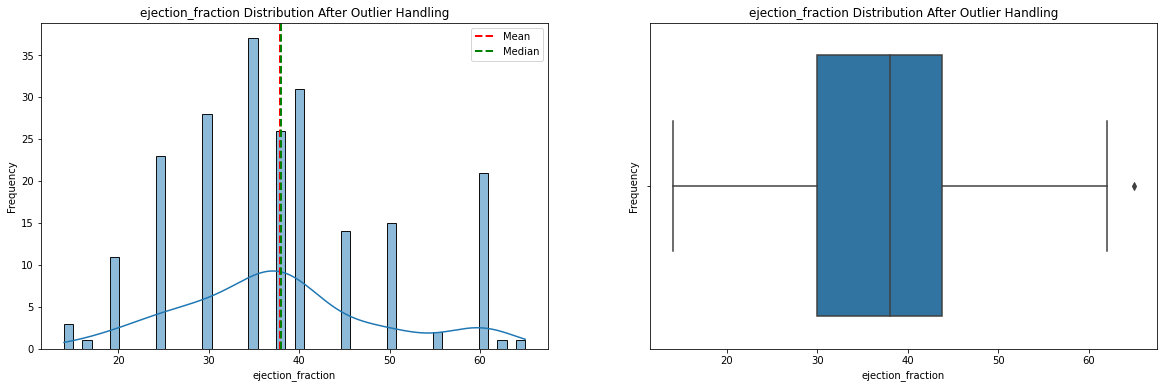

In [338]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='ejection_fraction', data=df_train, bins=50, kde=True)
plt.axvline(df_train.ejection_fraction.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_train.ejection_fraction.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('ejection_fraction Distribution After Outlier Handling')
plt.xlabel('ejection_fraction')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='ejection_fraction', data=df_train)
plt.title('ejection_fraction Distribution After Outlier Handling')
plt.xlabel('ejection_fraction')
plt.ylabel('Frequency')
plt.show()

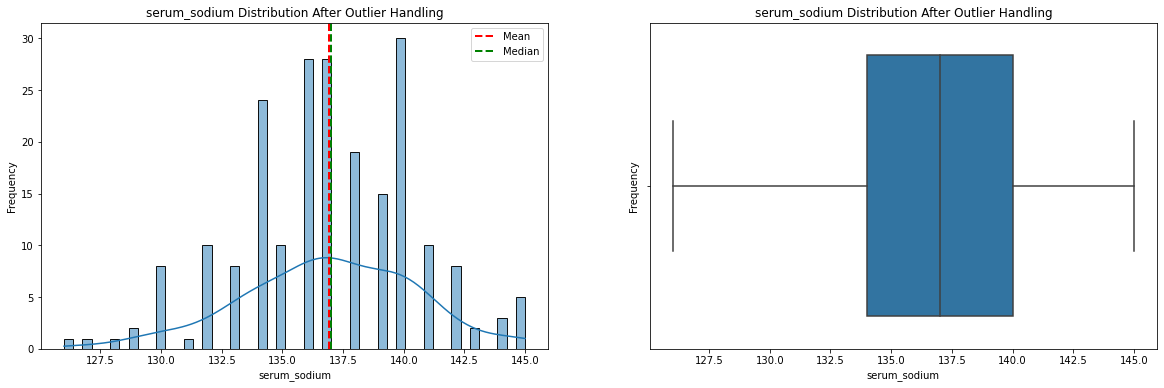

In [339]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='serum_sodium', data=df_train, bins=50, kde=True)
plt.axvline(df_train.serum_sodium.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_train.serum_sodium.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('serum_sodium Distribution After Outlier Handling')
plt.xlabel('serum_sodium')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='serum_sodium', data=df_train)
plt.title('serum_sodium Distribution After Outlier Handling')
plt.xlabel('serum_sodium')
plt.ylabel('Frequency')
plt.show()

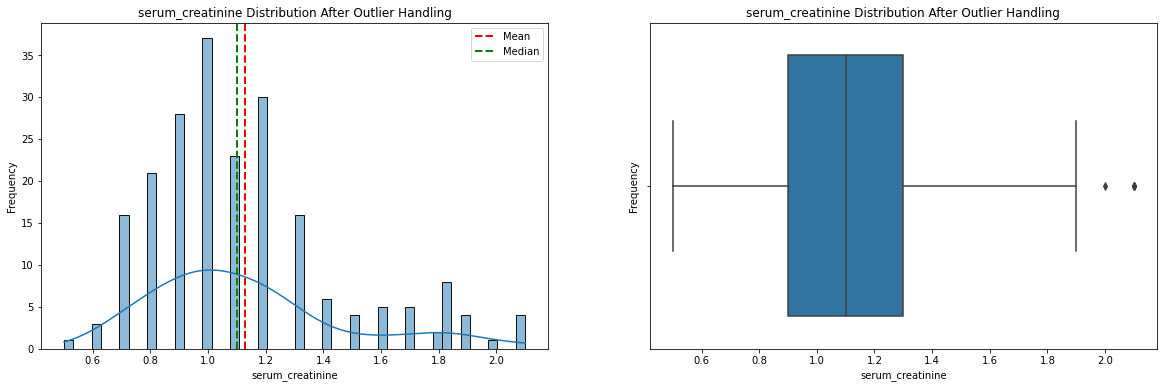

In [340]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='serum_creatinine', data=df_train, bins=50, kde=True)
plt.axvline(df_train.serum_creatinine.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_train.serum_creatinine.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('serum_creatinine Distribution After Outlier Handling')
plt.xlabel('serum_creatinine')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='serum_creatinine', data=df_train)
plt.title('serum_creatinine Distribution After Outlier Handling')
plt.xlabel('serum_creatinine')
plt.ylabel('Frequency')
plt.show()

### V.IV. Handling Missing Values

In [341]:
df_train.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [342]:
df_test.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [343]:
df_inf.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Diketahui tidak ditemukan missing values pada `df_train`, `df_test`, dan `df_inf`.

## V.V. Feature Selection
Diketahui bahwa beberapa parameter yang paling memengaruhi kolom `DEATH_EVENT` adalah `age`, `ejection_fraction`, `serum_creatinine`, dan `serum_sodium`. Kolom `time` meskipun memiliki korelasi tinggi dengan target, tidak dipakai sebagai feature karena tidak ada 'end user' yang dapat memberi nilai waktu, karena mereka tidak tahu jam berapa di masa depan pasien akan mati. Reference: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/discussion/178372

In [344]:
X_train = df_train[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']] # Features
y_train = df_train.DEATH_EVENT # Target

X_test = df_test[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']] # Features
y_test = df_test.DEATH_EVENT # Target

In [345]:
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 2.02425640e+00,  1.50712651e-02, -6.74949570e-01,
        -2.54732846e-01],
       [-5.68084086e-01,  1.50712651e-02,  7.98919899e-01,
         2.33938328e-02],
       [-1.00960457e-03,  1.98605782e+00, -1.26449736e+00,
        -2.54732846e-01],
       [-1.62122241e+00, -2.53699629e-01, -6.74949570e-01,
         2.33938328e-02],
       [-1.29717985e+00, -7.01651119e-01,  1.38846769e+00,
        -1.92349292e+00],
       [-8.11116006e-01, -1.59755410e+00,  2.27278937e+00,
         2.33938328e-02],
       [-1.63030885e-01, -2.53699629e-01, -6.74949570e-01,
         5.79647190e-01],
       [-1.21616921e+00,  1.53810633e+00, -9.69723463e-01,
         1.13590055e+00],
       [ 6.47075517e-01, -2.53699629e-01, -8.54017823e-02,
        -8.10986204e-01],
       [ 1.78122448e+00, -7.01651119e-01,  2.09372111e-01,
        -1.36723956e+00],
       [-4.06062806e-01,  1.94251861e-01, -3.80175676e-01,
         3.01520512e-01],
       [ 1.21415000e+00, -1.59755410e+00,  2.27278937e+00,
      

In [346]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.head()

,0,1,2,3
0,2.024256,0.015071,-0.674950,-0.254733
1,-0.568084,0.015071,0.798920,0.023394
2,-0.001010,1.986058,-1.264497,-0.254733
3,-1.621222,-0.253700,-0.674950,0.023394
4,-1.297180,-0.701651,1.388468,-1.923493


In [347]:
X_test.head()

,0,1,2,3
0,0.485054,0.015071,-0.380176,-0.254733
1,-0.163031,0.015071,-1.264497,1.414027
2,0.161012,-0.253700,-0.380176,-0.254733
3,0.404044,-0.253700,-0.085402,1.414027
4,-0.811116,-0.701651,-0.969723,0.301521


# VI. Model Definition
> Akan dibuat **2 model**, dimana:
- `model_rf` untuk **Random Forest**.
- `model_xgb` untuk **XGBoost**.

In [348]:
model_rf = RandomForestClassifier(random_state=4)
model_xgb = XGBClassifier()

# VII. Model Training
> Seteah model dibuat, selanjutnya setiap model akan dilatih menggunakan data trainnya masing-masing.

In [349]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [350]:
model_xgb.fit(X_train, y_train)

[21:44:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# VIII. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

In [351]:
y_pred_train_log = model_rf.predict(X_train)
y_pred_test_log = model_rf.predict(X_test)

print(f'Accuracy on training set: {accuracy_score(y_train, y_pred_train_log)}')
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred_test_log)}')

Accuracy on training set: 1.0
Accuracy on test set: 0.7333333333333333


In [352]:
y_pred_train_svc = model_xgb.predict(X_train)
y_pred_test_svc = model_xgb.predict(X_test)

print(f'Accuracy on training set: {accuracy_score(y_train, y_pred_train_svc)}')
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred_test_svc)}')

Accuracy on training set: 1.0
Accuracy on test set: 0.6666666666666666


In [353]:
print('----Train Set----')
print(classification_report(y_train, model_rf.predict(X_train)))
print('----Test Set----')
print(classification_report(y_test, model_rf.predict(X_test)))

----Train Set----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        66

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214

----Test Set----
              precision    recall  f1-score   support

           0       0.92      0.72      0.80        46
           1       0.46      0.79      0.58        14

    accuracy                           0.73        60
   macro avg       0.69      0.75      0.69        60
weighted avg       0.81      0.73      0.75        60



Model Random Forest ini menghasilkan akurasi yang sempurna pada training setnya tetapi akurasi pada testing setnya tidak terlalu tinggi.

In [354]:
print('----Train Set----')
print(classification_report(y_train, model_xgb.predict(X_train)))
print('----Test Set----')
print(classification_report(y_test, model_xgb.predict(X_test)))

----Train Set----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        66

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214

----Test Set----
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        46
           1       0.33      0.43      0.38        14

    accuracy                           0.67        60
   macro avg       0.57      0.58      0.57        60
weighted avg       0.70      0.67      0.68        60



Model XGB ini menghasilkan akurasi yang sempurna pada training setnya tetapi akurasi pada testing setnya tidak sempurna walaupun mencapai akurasi yang tidak terlalu tinggi.

# IX. Model Inference
> Pada bagian ini tiap model akan diuji dengan menggunakan **10 data inference** yang sudah dipisahkan dari data training dan testing.

In [355]:
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,66.0,1,68,1,38,1,162000.00,1.00,136,0,0,95,0
1,58.0,0,144,1,38,1,327000.00,0.70,142,0,0,83,0
2,62.0,0,281,1,35,0,221000.00,1.00,136,0,0,108,0
3,65.0,0,892,1,35,0,263358.03,1.10,142,0,0,256,0
4,50.0,0,1548,0,30,1,211000.00,0.80,138,1,0,108,0
5,50.0,1,168,0,38,1,276000.00,1.10,137,1,0,11,1
6,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
7,80.0,0,776,1,38,1,192000.00,1.30,135,0,0,130,1
8,49.0,0,789,0,20,1,319000.00,1.10,136,1,1,55,1
9,60.0,0,96,1,38,0,228000.00,0.75,140,0,0,95,0


## IX.I Inference Preprocessing

In [356]:
df_inf_final = scaler.transform(df_inf[['age','ejection_fraction','serum_sodium','serum_creatinine']])

## IX.II. Prediction

In [357]:
y_pred_inf_rf = model_rf.predict(df_inf_final)
y_pred_inf_rf = pd.DataFrame(y_pred_inf_rf, columns=['DEATH_EVENT Prediction'])
y_pred_inf_rf

,DEATH_EVENT Prediction
0,1
1,1
2,0
3,0
4,1
5,1
6,1
7,1
8,1
9,1


In [358]:
y_pred_inf_xgb = model_xgb.predict(df_inf_final)
y_pred_inf_xgb = pd.DataFrame(y_pred_inf_xgb, columns=['DEATH_EVENT Prediction'])
y_pred_inf_xgb

,DEATH_EVENT Prediction
0,0
1,0
2,0
3,0
4,1
5,1
6,0
7,1
8,1
9,0


In [359]:
pd.concat([df_inf.reset_index(drop=True), y_pred_inf_rf], axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,DEATH_EVENT Prediction
0,66.0,1,68,1,38,1,162000.00,1.00,136,0,0,95,0,1
1,58.0,0,144,1,38,1,327000.00,0.70,142,0,0,83,0,1
2,62.0,0,281,1,35,0,221000.00,1.00,136,0,0,108,0,0
3,65.0,0,892,1,35,0,263358.03,1.10,142,0,0,256,0,0
4,50.0,0,1548,0,30,1,211000.00,0.80,138,1,0,108,0,1
5,50.0,1,168,0,38,1,276000.00,1.10,137,1,0,11,1,1
6,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1,1
7,80.0,0,776,1,38,1,192000.00,1.30,135,0,0,130,1,1
8,49.0,0,789,0,20,1,319000.00,1.10,136,1,1,55,1,1
9,60.0,0,96,1,38,0,228000.00,0.75,140,0,0,95,0,1


In [360]:
pd.concat([df_inf.reset_index(drop=True), y_pred_inf_xgb], axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,DEATH_EVENT Prediction
0,66.0,1,68,1,38,1,162000.00,1.00,136,0,0,95,0,0
1,58.0,0,144,1,38,1,327000.00,0.70,142,0,0,83,0,0
2,62.0,0,281,1,35,0,221000.00,1.00,136,0,0,108,0,0
3,65.0,0,892,1,35,0,263358.03,1.10,142,0,0,256,0,0
4,50.0,0,1548,0,30,1,211000.00,0.80,138,1,0,108,0,1
5,50.0,1,168,0,38,1,276000.00,1.10,137,1,0,11,1,1
6,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1,0
7,80.0,0,776,1,38,1,192000.00,1.30,135,0,0,130,1,1
8,49.0,0,789,0,20,1,319000.00,1.10,136,1,1,55,1,1
9,60.0,0,96,1,38,0,228000.00,0.75,140,0,0,95,0,0


In [361]:
print(classification_report(df_inf['DEATH_EVENT'], y_pred_inf_rf))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.50      1.00      0.67         4

    accuracy                           0.60        10
   macro avg       0.75      0.67      0.58        10
weighted avg       0.80      0.60      0.57        10



In [362]:
print(classification_report(df_inf['DEATH_EVENT'], y_pred_inf_xgb))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



# X. Pengambilan Kesimpulan

Dataset yang digunkan berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. `DEATH_EVENT` adalah variabel target untuk diprediksi. 

Diketahui dari EDA, kolom `age`, `ejection_fraction`, `serum_sodium`, `serum_creatinine`, dan `time` memiliki korelasi terbesar dengan kolom target, maka kolom-kolom tersebut akan digunakan pada feature selection, kecuali untuk kolom `time`. Mayoritas yang tercatat merupakan orang dengan `age` sekitar **50 tahun** hingga **70 tahun**. Diketahui orang yang meninggal memiliki persentase darah yang meninggalkan jantung dan kadar natrium yang lebih rendah dibandingkan dengan orang yang tidak meninggal, namun memiliki kadar kreatinin yang lebih tinggi dibandingkan dengan orang yang tidak meninggal. Diketahui juga bahwa lebih banyak orang yang tercatat tidak mengalami kematian dibandingkan dengan orang yang mengalami kematian.

Dalam model evaluation, diketahui bahwa model Random Forest dan XGBoost menghasilkan akurasi yang sempurna pada training setnya tetapi akurasi pada testing setnya tidak terlalu tinggi. Kedua model tersebut tergolong overfitting dikarenakan gap yang terlalu besar antara f1-score dari training set dengan test set.

Dalam model inference, diketahui bahwa model Random Forest menghasilkan akurasi lebih rendah dibandingkan dengan XGBoost, dimana model tersebut menghasilkan akurasi yang cukup tinggi. Dapat dilihat dalam model XGBoost f1-score dari 1.0 ini lebih kecil dibandingkan dengan f1-score dari 0.0, dimana model Random Forest f1-score dari 0.0 memiliki nilai rendah dibandingkan dengan f1-score dari 1.0.